In [ ]:
# 📦 Importation des bibliothèques
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!apt-get install unrar -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
image_folder = "/content/kdeff"

In [ ]:
import os
import shutil

rar_path = "/content/kdeff.rar"
extract_path = "/content/kdeff"

# Nettoyer l'ancien dossier s'il existe
if os.path.exists(extract_path):
    shutil.rmtree(extract_path)

!unrar x -y "{rar_path}" "{extract_path}/"


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Extracting  /content/kdeff/kdeff/sad/Training_78060020.jpg                85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_78077558.jpg                85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_78106696.jpg                85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_78109009.jpg                85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_7811127.jpg                 85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_78115403.jpg                85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_78130963.jpg                85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_78142280.jpg                85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_7816570.jpg                 85%  OK 
Extracting  /content/kdeff/kdeff/sad/Training_78178750.jpg                85%  OK 
Ex

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Dossier d’images après extraction
image_folder = extract_path

# 🔄 Initialisation
formats = []
dimensions = []
mean_colors = []

# 📷 Traitement des images
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff", ".gif")):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    formats.append(img.format)
                    dimensions.append(img.size)

                img_cv = cv2.imread(image_path)
                if img_cv is not None:
                    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
                    mean_color = img_cv.mean(axis=(0, 1))
                    mean_colors.append(mean_color)
            except Exception as e:
                print(f"Erreur avec le fichier {file} : {e}")


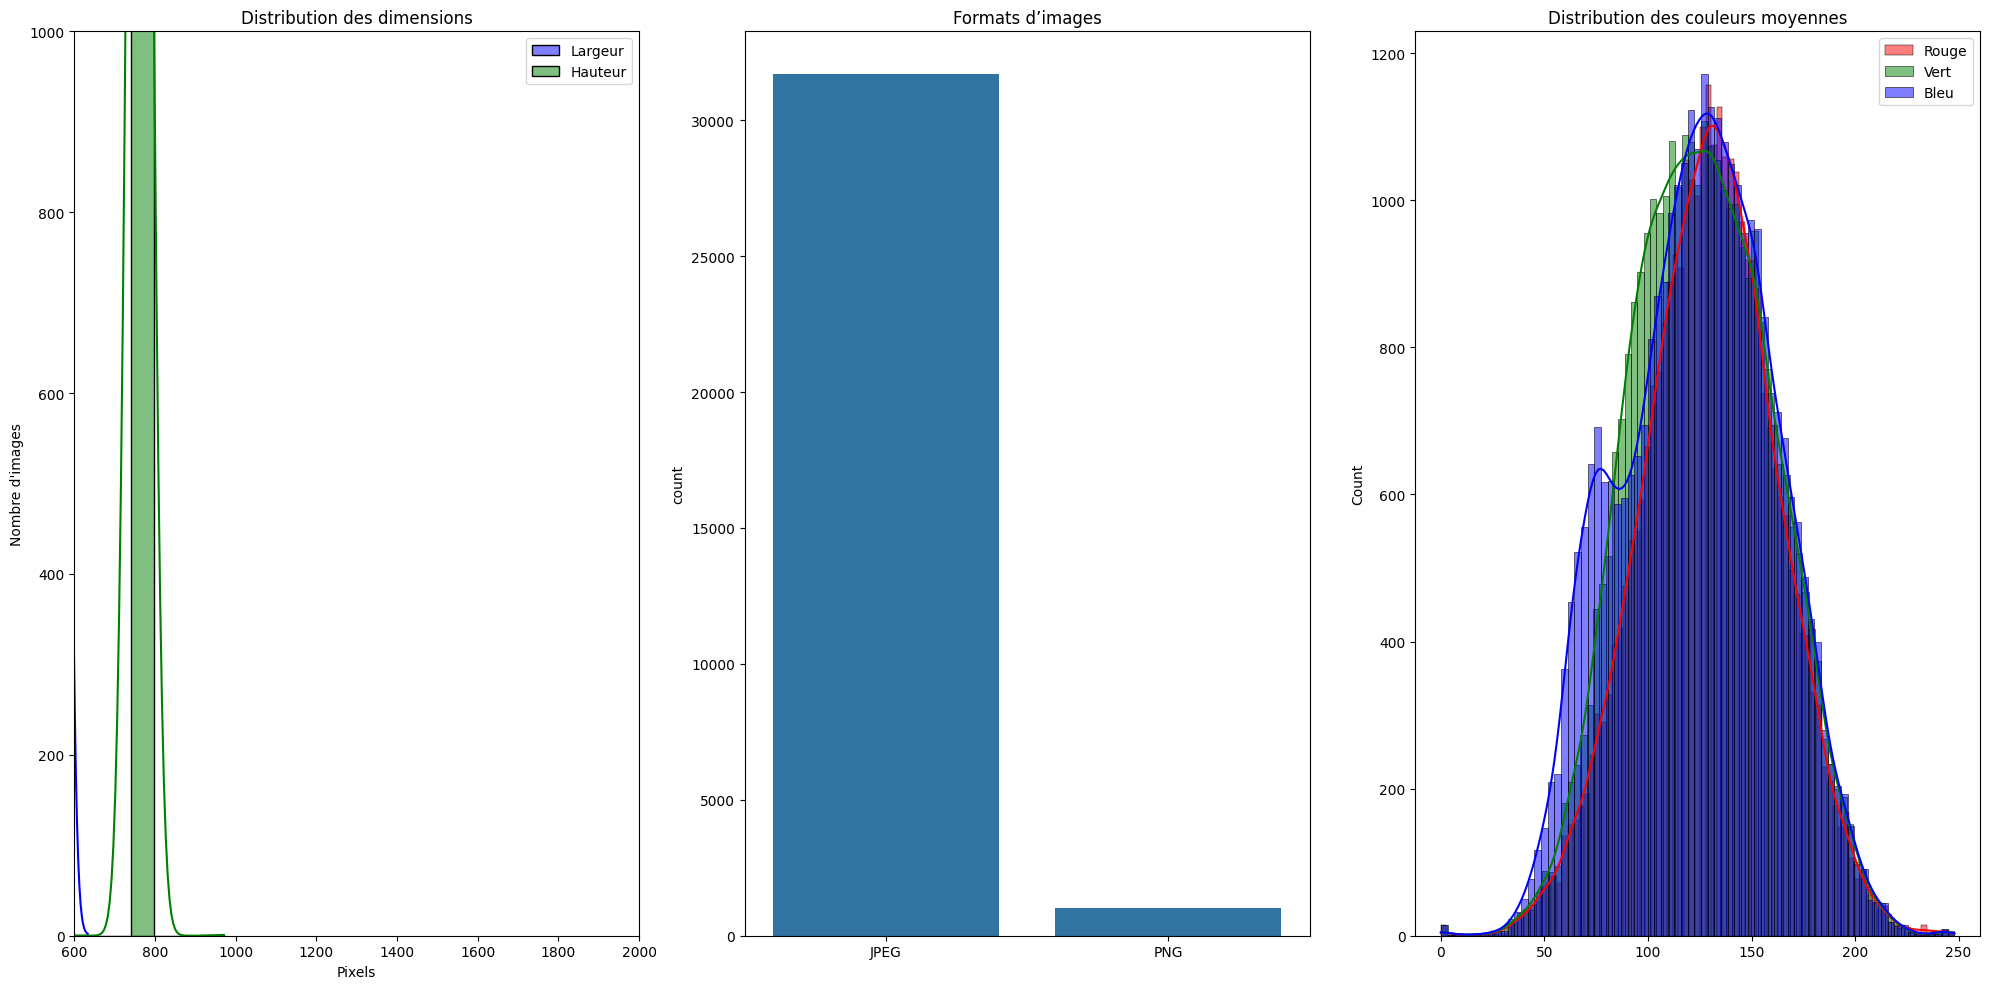

In [ ]:
# 🔢 Transformation en tableaux numpy
dimensions = np.array(dimensions)
mean_colors = np.array(mean_colors)

# 📊 Visualisation
plt.figure(figsize=(20, 10))

# 1. Distribution des dimensions
plt.subplot(1, 3, 1)
sns.histplot(dimensions[:, 0], kde=True, color="blue", label="Largeur")
sns.histplot(dimensions[:, 1], kde=True, color="green", label="Hauteur")
plt.title("Distribution des dimensions")
plt.xlabel("Pixels")
plt.ylabel("Nombre d'images")
plt.legend()
plt.xlim(600, 2000)
plt.ylim(0, 1000)

# 2. Formats des images
plt.subplot(1, 3, 2)
sns.countplot(x=formats)
plt.title("Formats d’images")

# 3. Moyennes des couleurs (R, G, B)
plt.subplot(1, 3, 3)
sns.histplot(mean_colors[:, 0], color='red', label="Rouge", kde=True)
sns.histplot(mean_colors[:, 1], color='green', label="Vert", kde=True)
sns.histplot(mean_colors[:, 2], color='blue', label="Bleu", kde=True)
plt.title("Distribution des couleurs moyennes")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install opencv-python pillow


In [ ]:
import os
from PIL import Image
import cv2
import shutil

# 🔄 Paramètres
source_dir = "/content/kdeff"
clean_dir = "/content/kdeff_clean"
target_size = (800, 700)  # Largeur x Hauteur

# 🔄 Nettoyer ancien dossier si existe
if os.path.exists(clean_dir):
    shutil.rmtree(clean_dir)
os.makedirs(clean_dir)

# 🔁 Parcourir les images
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff", ".gif")):
            try:
                # 📍Chemins
                image_path = os.path.join(root, file)

                # 📤 Ouvrir image avec PIL
                img = Image.open(image_path).convert("RGB")  # Supprime le canal alpha si présent

                # 📐 Redimensionner
                img = img.resize(target_size)

                # 📁 Chemin de sauvegarde (conserver la structure si nécessaire)
                relative_path = os.path.relpath(root, source_dir)
                save_dir = os.path.join(clean_dir, relative_path)
                os.makedirs(save_dir, exist_ok=True)

                # 💾 Sauvegarder en .jpg
                filename = os.path.splitext(file)[0] + ".jpg"
                save_path = os.path.join(save_dir, filename)
                img.save(save_path, format="JPEG", quality=95)

            except Exception as e:
                print(f"Erreur avec {file} : {e}")


In [ ]:
import os

# Vérifier les extensions valides
valid_ext = (".png", ".jpg", ".jpeg", ".bmp", ".tiff", ".gif")

# Recompter les fichiers image dans le dossier extrait
image_paths = []
for root, dirs, files in os.walk("/content/kdeff"):
    for file in files:
        if file.lower().endswith(valid_ext):
            image_paths.append(os.path.join(root, file))

print(f"Nombre d'images trouvées : {len(image_paths)}")


Nombre d'images trouvées : 32704


In [ ]:
import shutil

shutil.make_archive("/content/kdeff_clean", 'zip', "/content/kdeff_clean")


'/content/kdeff_clean.zip'

In [ ]:
from google.colab import files
files.download("/content/kdeff_clean.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>